### Machine Learning

#### A | classifying a mineral based on the information from sample pixels

rationale:
* with X-ray maps, we can stack information and get a combination of intesities for each pixel
* then, isolating pixels from a specific minera, e.g. garnet, we can model all other pixels

In [1]:
# importing libs
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# utils
from src.xraymap import XrayMap # map Class
from src.utils import get_dirs # function that reads directories

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest

# setting up plots
plt.rcParams["figure.figsize"] = (16,8)

#### sample

In [2]:
df_Al = XrayMap(element="Al")
df_Fe = XrayMap(element="Fe")
df_Si = XrayMap(element="Si")
df_Mg = XrayMap(element="Mg")

# true_Grt = XrayMap(element="true_Grt")

# true_Grt = pd.read_csv(os.path.join(get_dirs()["DATA_DIR"], "trueGrt.csv"))

Al.csv found!
Fe.csv found!
Si.csv found!
Mg.csv found!


In [3]:
df_Al.data.describe()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
count,342.0,342.0,342.0,342.0,342.0,342.0,342.0,342.0,342.0,342.0,...,342.0,342.0,342.0,342.0,342.0,342.0,342.0,342.0,342.0,342.0
mean,4558.353801,4526.511696,4522.964912,4476.140351,4391.260234,4361.073099,4311.040936,4225.391813,4084.350877,4083.195906,...,3820.309942,3836.187135,3894.166667,3970.628655,3991.815789,4031.959064,4064.821637,4085.979532,4086.160819,4100.28655
std,1095.84777,1102.623802,1115.444497,1114.42583,1128.700854,1066.868025,1019.677566,1006.759576,1176.827464,1205.166687,...,1630.445609,1578.125764,1580.525668,1498.952455,1445.982,1425.554007,1402.42738,1428.789181,1413.291533,1423.394911
min,1960.0,1228.0,50.0,25.0,33.0,30.0,50.0,19.0,12.0,20.0,...,15.0,15.0,18.0,20.0,18.0,15.0,18.0,16.0,17.0,18.0
25%,3777.0,3763.25,3774.0,3760.0,3742.75,3758.0,3750.0,3746.0,3726.5,3723.5,...,3693.0,3689.25,3700.25,3700.25,3698.25,3702.0,3711.25,3698.25,3706.0,3706.25
50%,3874.0,3860.0,3863.5,3856.0,3830.5,3823.0,3827.0,3812.5,3790.5,3784.0,...,3760.0,3752.0,3770.0,3760.5,3759.0,3766.0,3764.0,3765.5,3774.5,3763.0
75%,6064.0,6080.0,6047.0,6006.25,5948.0,5464.5,4155.25,4119.25,3957.5,3951.0,...,3868.75,3836.5,3869.0,3896.25,3870.25,3865.0,3879.25,3915.5,4047.25,4098.5
max,6378.0,6403.0,6392.0,6793.0,6342.0,6275.0,6326.0,6818.0,6357.0,6579.0,...,6335.0,6249.0,6298.0,6342.0,6390.0,6360.0,6271.0,6310.0,6298.0,6373.0


In [4]:
df_Al.dimensions

(342, 258)

(342, 258)


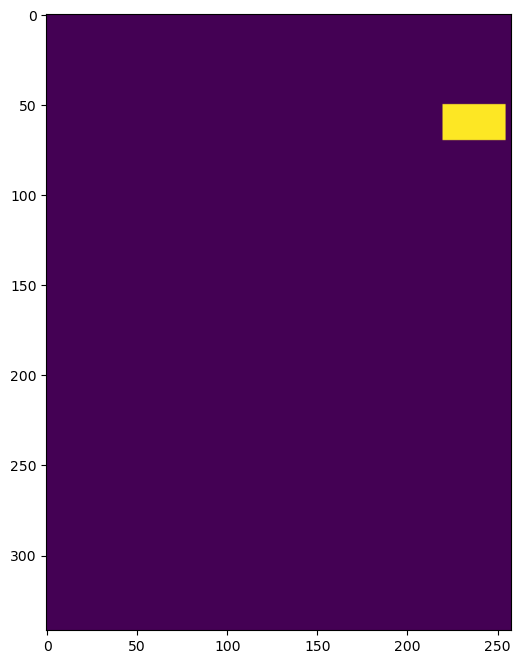

In [5]:
true_grt = np.zeros(df_Al.dimensions)
print(true_grt.shape)
true_grt[50:70,220:255] = 1

plt.imshow(true_grt)
plt.show()

In [6]:
for df in [df_Al, df_Fe, df_Si, df_Mg, true_grt]: 
  print(df.data.shape)

(342, 258)
(342, 258)
(342, 258)
(342, 258)
(342, 258)


In [7]:
df_composition = np.stack([df_Al.data, df_Fe.data, df_Mg.data, df_Si.data, true_grt], axis=-1)
print(df_composition.shape)

(342, 258, 5)


In [8]:
df_good = pd.DataFrame(df_composition.reshape(-1, df_composition.shape[-1]), columns=["Al","Fe","Mg","Si", "flGrt"])
df_good_labeled = df_good[df_good.flGrt == 1]

* modelling

In [9]:
X = df_good_labeled[["Al", "Fe", "Mg", "Si"]]
y = df_good_labeled["flGrt"].astype(int)

model = LogisticRegression()
model_forest = IsolationForest()
model_forest.fit(X)

IsolationForest()

In [10]:
df_to_predict = df_good.drop(columns=["flGrt"], inplace=False)

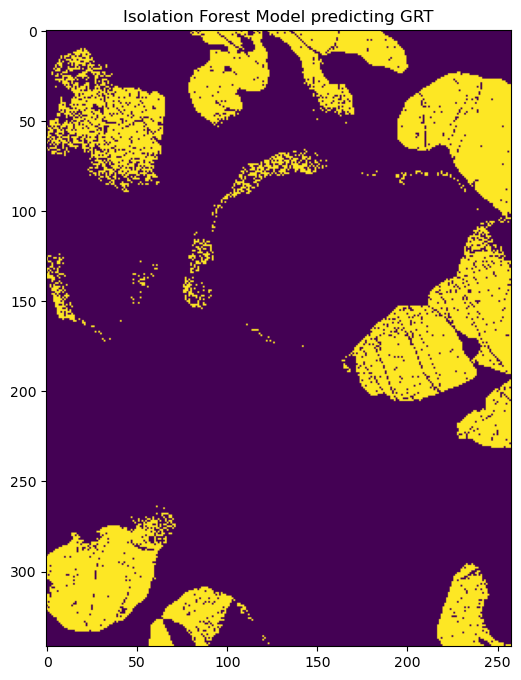

In [12]:
plt.imshow(model_forest.predict(df_to_predict).reshape(342, 258))
plt.title("Isolation Forest Model predicting GRT")
plt.show()